# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [28]:
# Find the table using the appropriate class or tag
table = soup.find('table', class_='table')  

In [30]:
# Extract all rows from the table
rows = table.find_all('tr')

# Loop through each row and extract the data
for row in rows:
    # Find all table cells in each row
    cols = row.find_all('td')
    
    # Get the text content from each cell, strip out extra spaces
    cols = [ele.text.strip() for ele in cols]
    
    # Append the row data to the list if it's not empty
    if cols:
        table_data.append(cols)

# Print to check the extracted data
print(table_data)



[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [31]:
# Create an empty list
table_data = []


# Loop through the scraped data to create a list of rows
for row in rows:
    # Extract all the cells (td elements) in the row
    cols = row.find_all('td')
    
    # Get the text from each cell and clean it up
    cols = [ele.text.strip() for ele in cols]
    
    # Append the row to the table_data list if it's not empty
    if cols:
        table_data.append(cols)

In [32]:
# Define the column names as given in the instructions
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a Pandas DataFrame using the scraped data and column names
mars_weather_df = pd.DataFrame(table_data, columns=columns)


In [33]:

# Display the DataFrame to confirm it's correctly structured
print(mars_weather_df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Check the data types of each column
print(mars_weather_df.dtypes)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [12]:
# Convert 'terrestrial_date' to datetime format
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

# Convert 'sol', 'month', and 'id' to integer format
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)
mars_weather_df['id'] = mars_weather_df['id'].astype(int)

# Convert 'min_temp' and 'pressure' to float format
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)


In [13]:
# Confirm type changes were successful by examining data types again

print(mars_weather_df.dtypes)


id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                          object
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
num_months = mars_weather_df['month'].nunique()
print(f"There are {num_months} unique months on Mars.")

There are 12 unique months on Mars.


In [15]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = mars_weather_df['sol'].nunique()
print(f"There are {num_sols} sols worth of data in the dataset.")

There are 1867 sols worth of data in the dataset.


In [16]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()

# Display the result
print(avg_min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


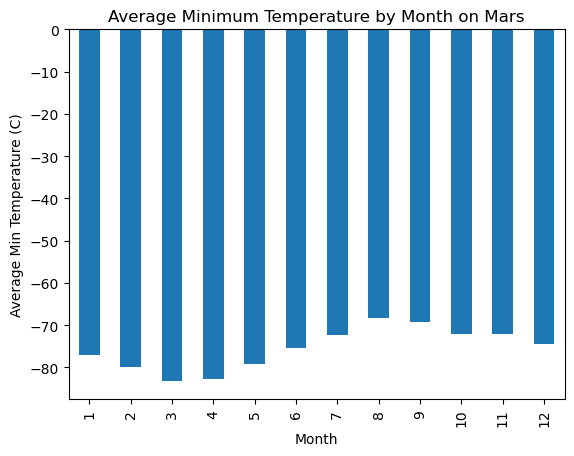

In [17]:
# Plot the average minimum temperature by month

avg_min_temp_by_month.plot(kind='bar', xlabel='Month', ylabel='Average Min Temperature (C)', title='Average Minimum Temperature by Month on Mars')
plt.show()


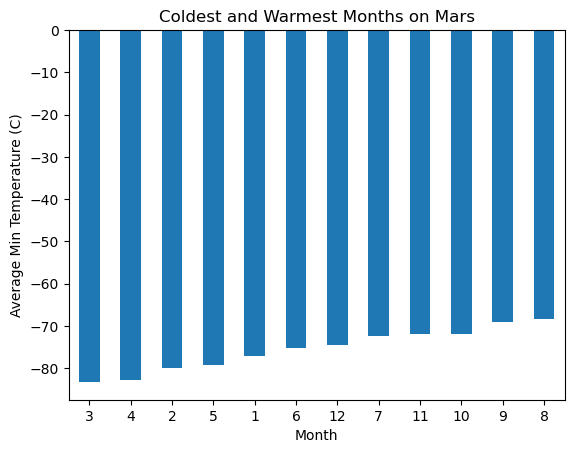

The coldest month on Mars is month 3 and the warmest month is month 8.


In [24]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous grap

# Sort the average minimum temperature by month in ascending order
sorted_avg_min_temp_by_month = avg_min_temp_by_month.sort_values()

# Plot the sorted average minimum temperature
sorted_avg_min_temp_by_month.plot(kind='bar', xlabel='Month', ylabel='Average Min Temperature (C)', title='Coldest and Warmest Months on Mars')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()

# Identify the coldest and warmest months based on sorted data
coldest_month = sorted_avg_min_temp_by_month.idxmin()
warmest_month = sorted_avg_min_temp_by_month.idxmax()
print(f"The coldest month on Mars is month {coldest_month} and the warmest month is month {warmest_month}.")

In [21]:
# 4. What is the average pressure by month?

# Calculate the average atmospheric pressure for each month
avg_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()

# Display the result
print(avg_pressure_by_month)


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


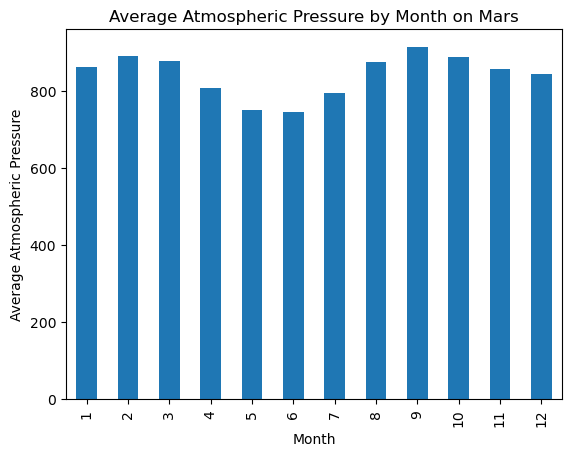

In [22]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar', xlabel='Month', ylabel='Average Atmospheric Pressure', title='Average Atmospheric Pressure by Month on Mars')
plt.show()

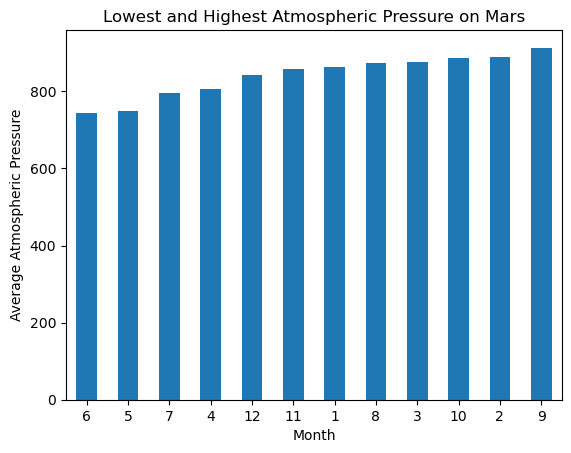

The month with the lowest pressure on Mars is month 6 and the month with the highest pressure is month 9.


In [23]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

# Sort the average atmospheric pressure by month in ascending order
sorted_avg_pressure_by_month = avg_pressure_by_month.sort_values()

# Plot the sorted average atmospheric pressure
sorted_avg_pressure_by_month.plot(kind='bar', xlabel='Month', ylabel='Average Atmospheric Pressure', title='Lowest and Highest Atmospheric Pressure on Mars')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()

# Identify the months with the lowest and highest pressure based on sorted data
lowest_pressure_month = sorted_avg_pressure_by_month.idxmin()
highest_pressure_month = sorted_avg_pressure_by_month.idxmax()
print(f"The month with the lowest pressure on Mars is month {lowest_pressure_month} and the month with the highest pressure is month {highest_pressure_month}.")


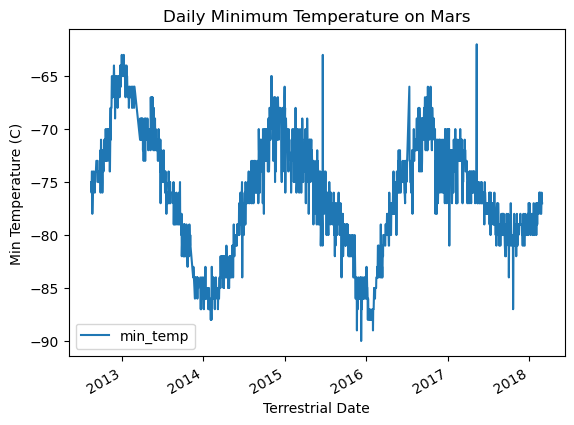

In [25]:
# 5. How many terrestrial (Earth) days are there in a Martian year?

# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_weather_df.plot(x='terrestrial_date', y='min_temp', xlabel='Terrestrial Date', ylabel='Min Temperature (C)', title='Daily Minimum Temperature on Mars')
plt.show()

#### Minimum Temperature

Analysis:
From the bar chart showing the average minimum temperature by month on Mars, we can observe the following:

The coldest month is Month 3, with an average minimum temperature close to -83°C.
The warmest month is Month 8, where the average minimum temperature reaches around -68°C.
This indicates significant temperature variation over the Martian year. The difference in temperature can be attributed to Mars’ elliptical orbit and axial tilt, which results in extreme seasonal variations. The data suggests that the coldest periods occur early in the Martian year, while the warmest periods are later on, particularly around Month 8.

#### Atmospheric Pressure

The bar chart displaying the average atmospheric pressure by month provides the following insights:

The lowest atmospheric pressure is observed in Month 6, with an average pressure of approximately 700 Pa.
The highest atmospheric pressure occurs in Month 9, with an average pressure close to 925 Pa.
Atmospheric pressure on Mars fluctuates significantly throughout the year due to seasonal CO₂ sublimation and deposition at the polar ice caps. During the colder months, atmospheric pressure drops as CO₂ freezes, while it increases in the warmer months as CO₂ sublimates back into the atmosphere.

#### Year Length

Analysis:
The line plot showing daily minimum temperature over time reveals a clear cyclic pattern, which indicates the duration of a Martian year. By visually analyzing the repeating temperature cycles, we can estimate that a Martian year lasts approximately 687 Earth days.

This pattern of temperature fluctuation highlights the cyclical nature of Mars' seasons, which are driven by its orbit around the Sun. The Martian year is nearly twice as long as an Earth year, which leads to prolonged seasonal changes that affect both temperature and atmospheric pressure.



### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [34]:
# Export the DataFrame to a CSV file
mars_weather_df.to_csv('mars_weather_data.csv', index=False)

# Confirm the file was saved
print("Data exported successfully to mars_weather_data.csv")

Data exported successfully to mars_weather_data.csv


In [27]:
browser.quit()